In [2]:
from dotenv import load_dotenv
load_dotenv(override=True)

True

### with_traceable()

In [10]:
from langsmith import traceable
from openai import OpenAI
from typing import List
import nest_asyncio
from langsmith import traceable, trace

MODEL_PROVIDER = "openai"
MODEL_NAME = "gpt-4o-mini"
APP_VERSION = 1.0
RAG_SYSTEM_PROMPT = """You are an assistant for question-answering tasks.
Answer all the questions asked by the user diligently.
If you don't know the answer, just say that you don't know.
"""

openai_client = OpenAI()
nest_asyncio.apply()

def generate_response(question: str):
    # Here we are tracing on a more granular level. We are tracing the  questions asked
    with trace(
        name="Generate Response", # name for this trace
        run_type="chain",
        inputs={"question": question},
        metadata={"foo": "bar"},
    ) as ls_trace:
        messages = [
        {
            "role": "system",
            "content": RAG_SYSTEM_PROMPT
        },
        {
            "role": "user",
            "content": f"Question: {question}"
        }
        ]
        response = call_openai(messages)
        ls_trace.end(outputs={"output": response})
    return response

@traceable()
def call_openai(
    messages: List[dict], model: str = MODEL_NAME, temperature: float = 0.0
) -> str:
    return openai_client.chat.completions.create(
        model=model,
        messages=messages,
        temperature=temperature,
    )

@traceable
def langsmith_rag(question: str):
    response = generate_response(question)
    return response.choices[0].message.content

#  A simple chatbot without chat history
@traceable
def chat_bot():
    count=1
    while True:
        question=input("Enter your question: ")
        if question == "exit":
            break
        response = langsmith_rag(question)
        count=count+1;
        print(response)



chat_bot()



Sure! Here are a few jokes for you:

1. Why don't scientists trust atoms?  
   Because they make up everything!

2. What do you call fake spaghetti?  
   An impasta!

3. Why did the scarecrow win an award?  
   Because he was outstanding in his field!

4. How does a penguin build its house?  
   Igloos it together!

5. Why did the bicycle fall over?  
   Because it was two-tired!

I hope these made you smile!
I'm just a program, so I don't have feelings, but I'm here and ready to help you! How can I assist you today?


Here we can see the non formatted output that traces on a more granular level:

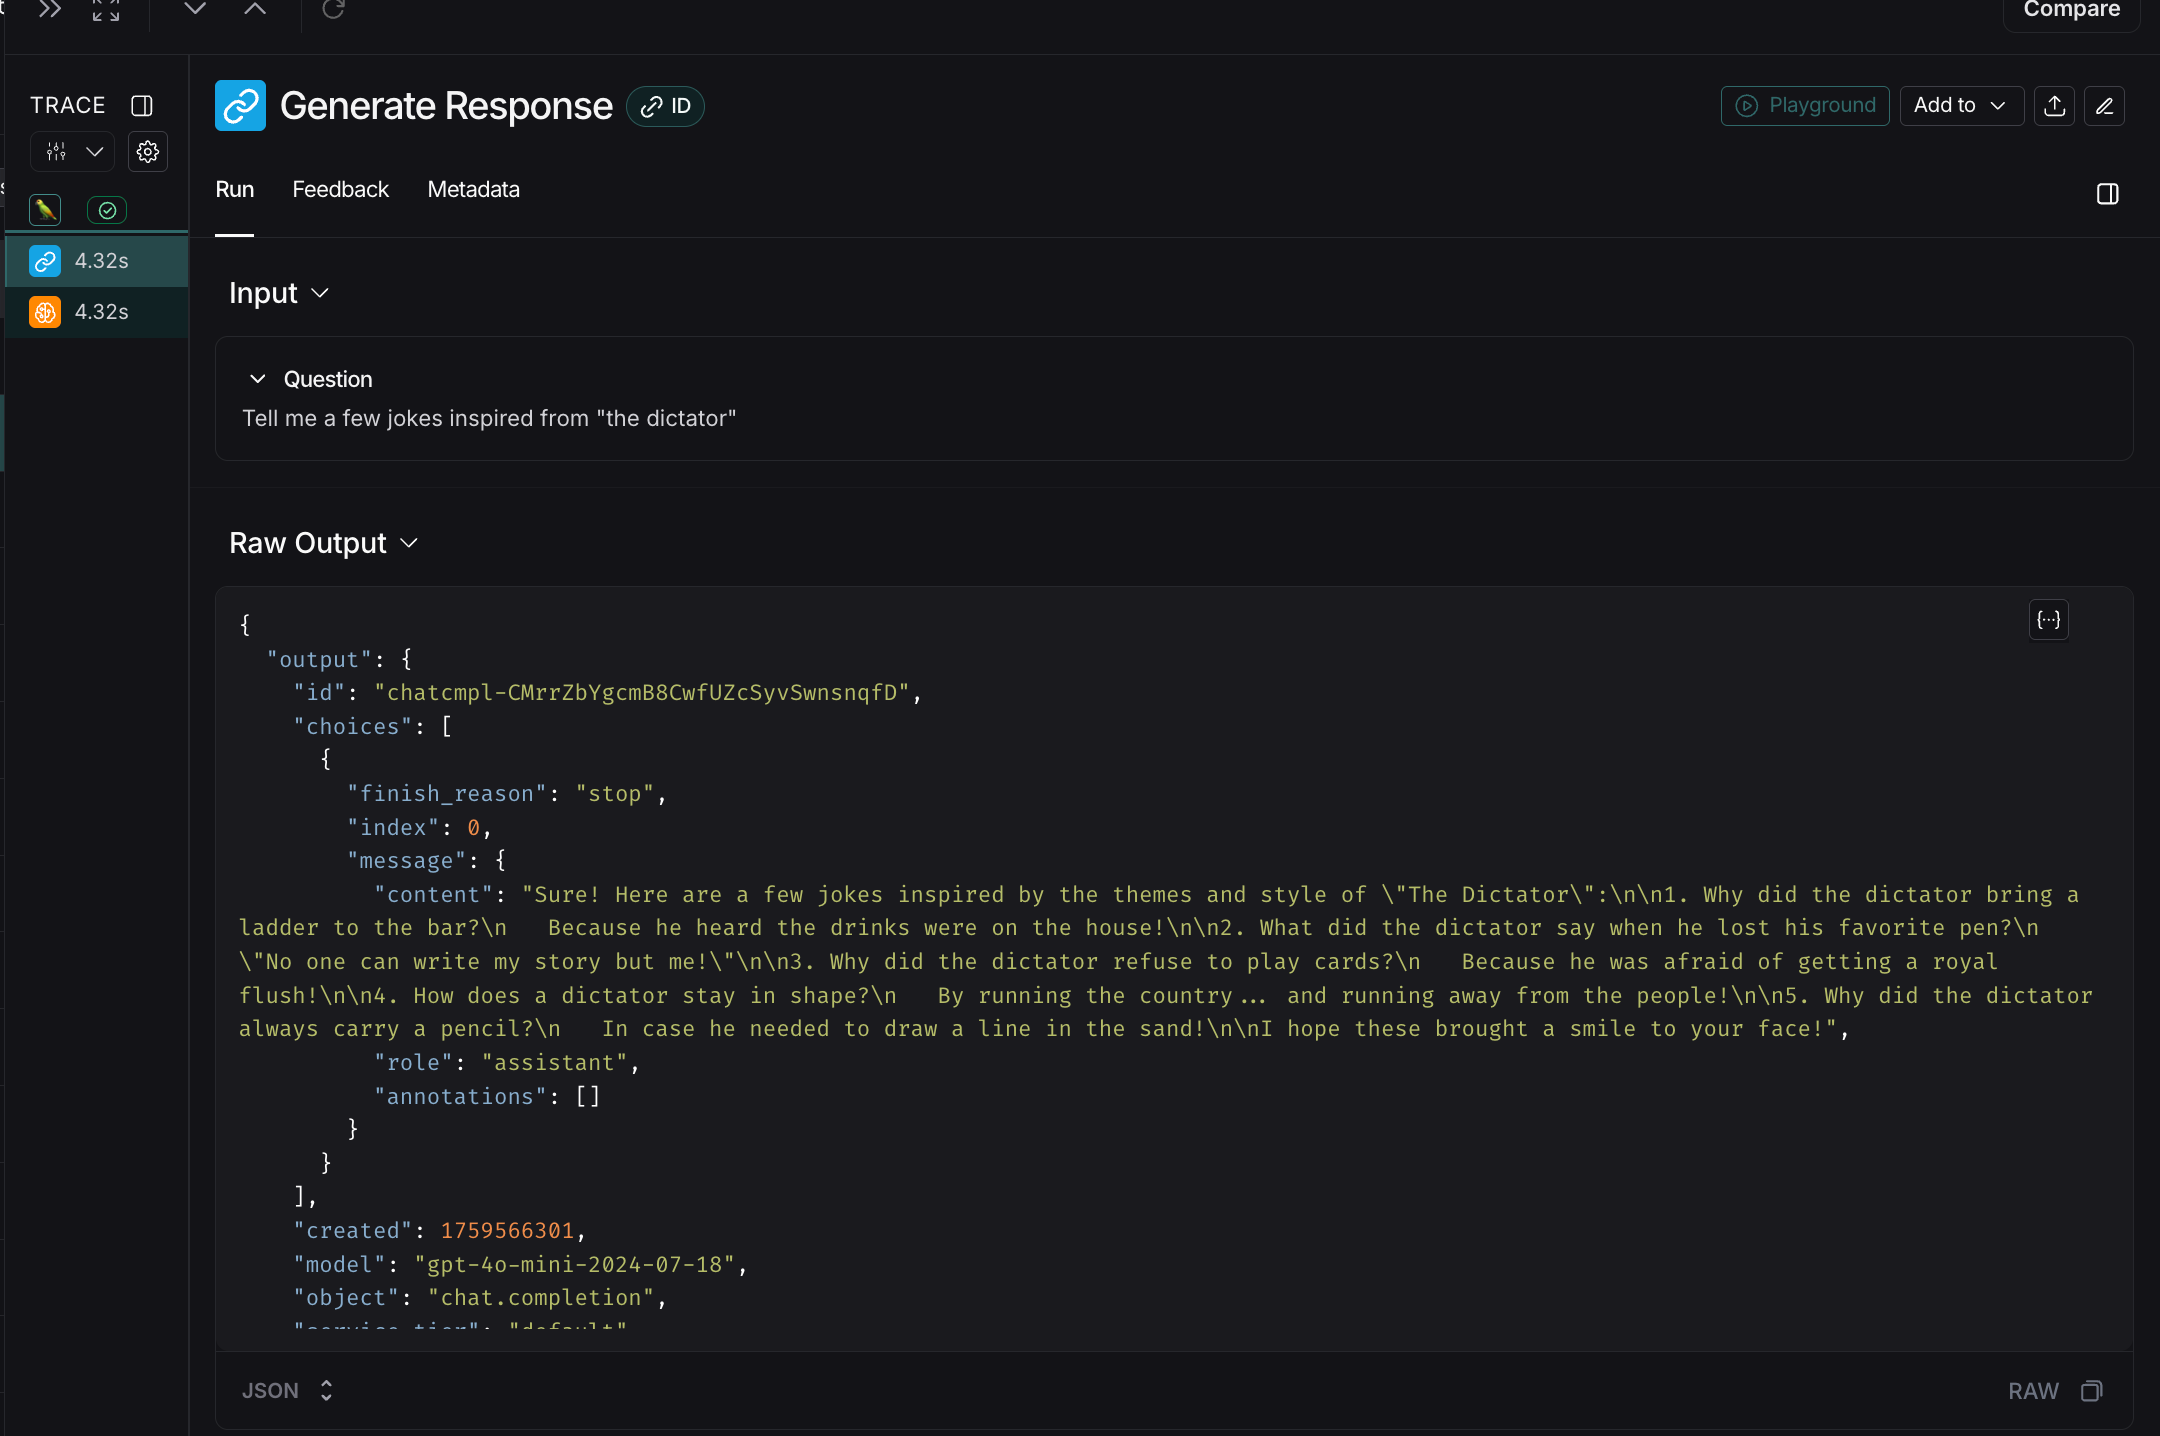

and heres the raw output after using the with_trace():

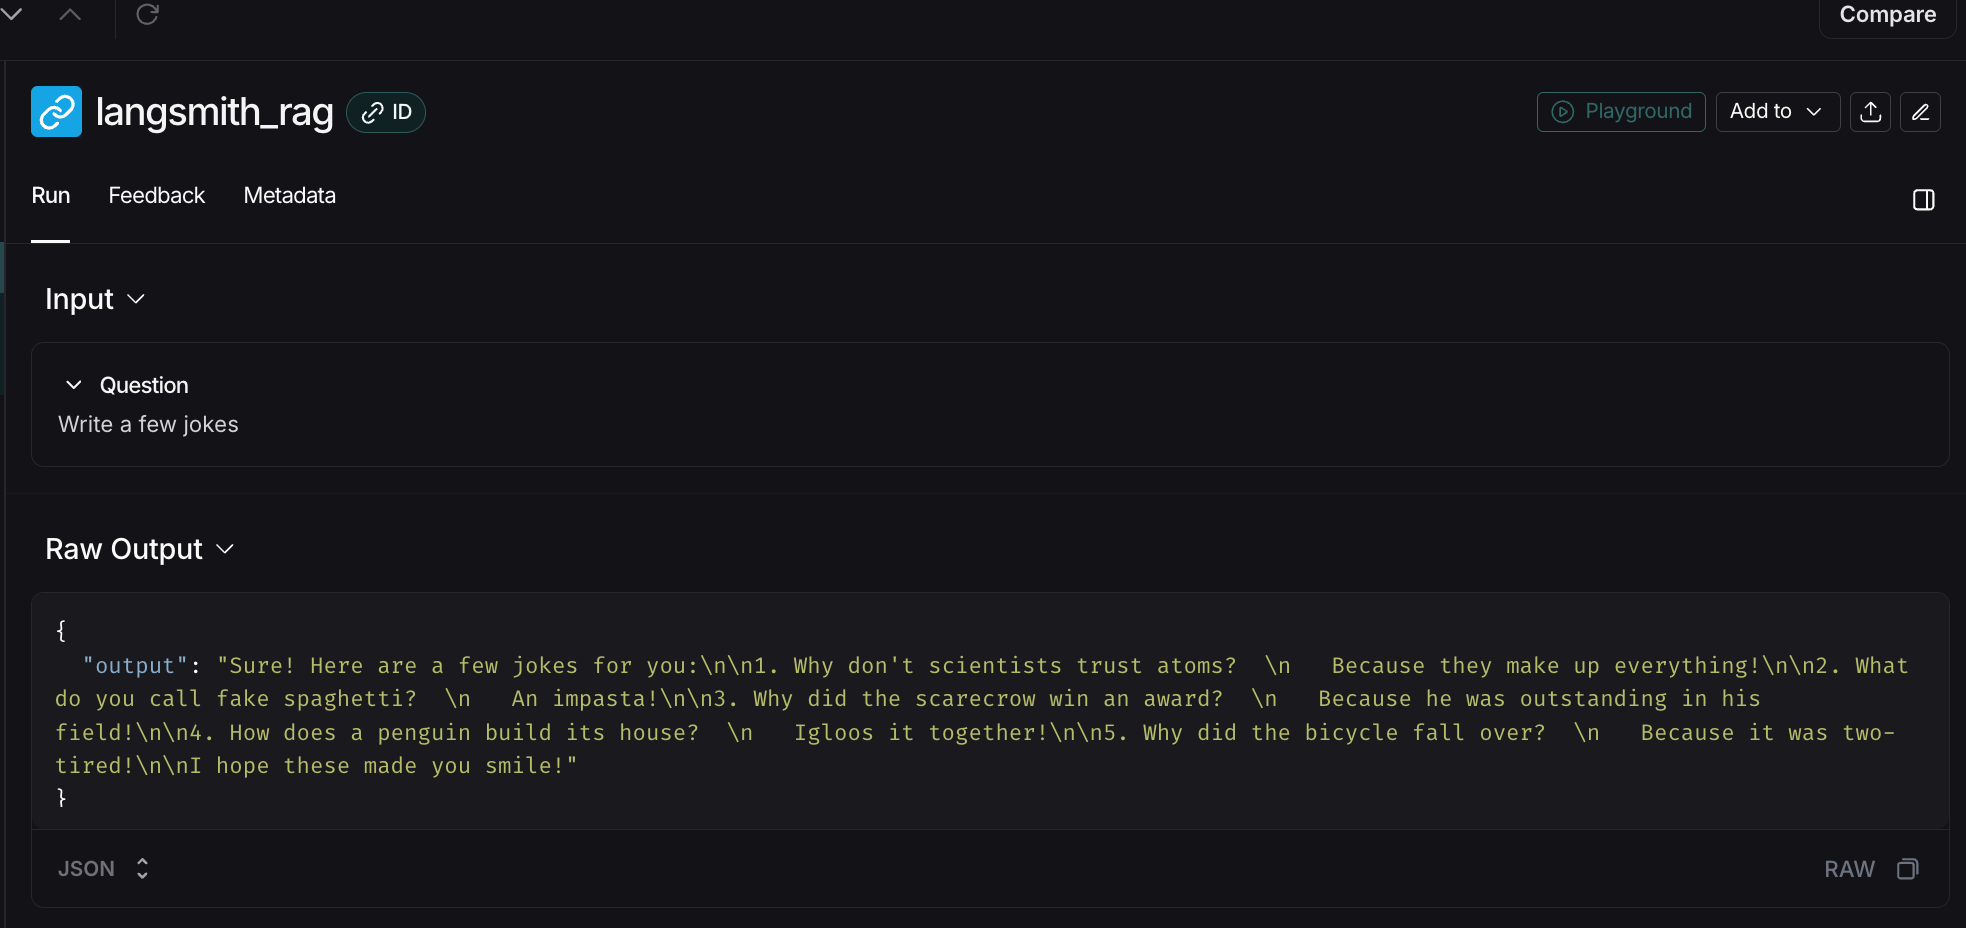


### wrap_openai()

In [12]:
from langsmith import traceable
from openai import OpenAI
from typing import List
import nest_asyncio
from langsmith import traceable, trace
from langsmith.wrappers import wrap_openai

MODEL_PROVIDER = "openai"
MODEL_NAME = "gpt-4o-mini"
APP_VERSION = 1.0
RAG_SYSTEM_PROMPT = """You are an assistant for question-answering tasks.
Answer all the questions asked by the user diligently.
If you don't know the answer, just say that you don't know.
"""

openai_client = wrap_openai(OpenAI())
nest_asyncio.apply()

def generate_response(question: str):
    messages = [
        {
            "role": "system",
            "content": RAG_SYSTEM_PROMPT
        },
        {
            "role": "user",
            "content": f"Question: {question}"
        }
    ]
    return openai_client.chat.completions.create(
        model=MODEL_NAME,
        messages=messages,
    )
    return response

@traceable()
def call_openai(
    messages: List[dict], model: str = MODEL_NAME, temperature: float = 0.0
) -> str:
    return openai_client.chat.completions.create(
        model=model,
        messages=messages,
        temperature=temperature,
    )

@traceable
def langsmith_rag_with_wrap_opeai(question: str):
    response = generate_response(question)
    return response.choices[0].message.content

#  A simple chatbot without chat history
@traceable
def chat_bot():
    count=1
    while True:
        question=input("Enter your question: ")
        if question == "exit":
            break
        response = langsmith_rag(question)
        count=count+1;
        print(response)



chat_bot()


Sure, here are a few light-hearted jokes related to the BJP:

1. Why did the BJP politician bring a ladder to the campaign?
   Because they wanted to reach new heights!

2. How does the BJP celebrate a successful event?
   They throw a "Modi-fied" party!

3. Why did the BJP member always carry a pencil?
   In case they had to draw a crowd!

Remember, humor can be subjective, and it's important to keep jokes respectful!
Sure! Here are a few light-hearted jokes about Congress:

1. Why don’t Congress members ever play hide and seek?
   Because good luck hiding when everyone is always trying to find them to vote!

2. How do you know when Congress is lying?
   Their lips are moving!

3. Why did the senator bring a pencil to Congress?
   Because he wanted to draw some important conclusions!

4. What’s the difference between Congress and a circus?
   In a circus, the clowns are just part of the show!

5. How many Congress members does it take to change a light bulb?
   Two. One to change it a

We can see that the inputs and outputs are now rendered nicely:

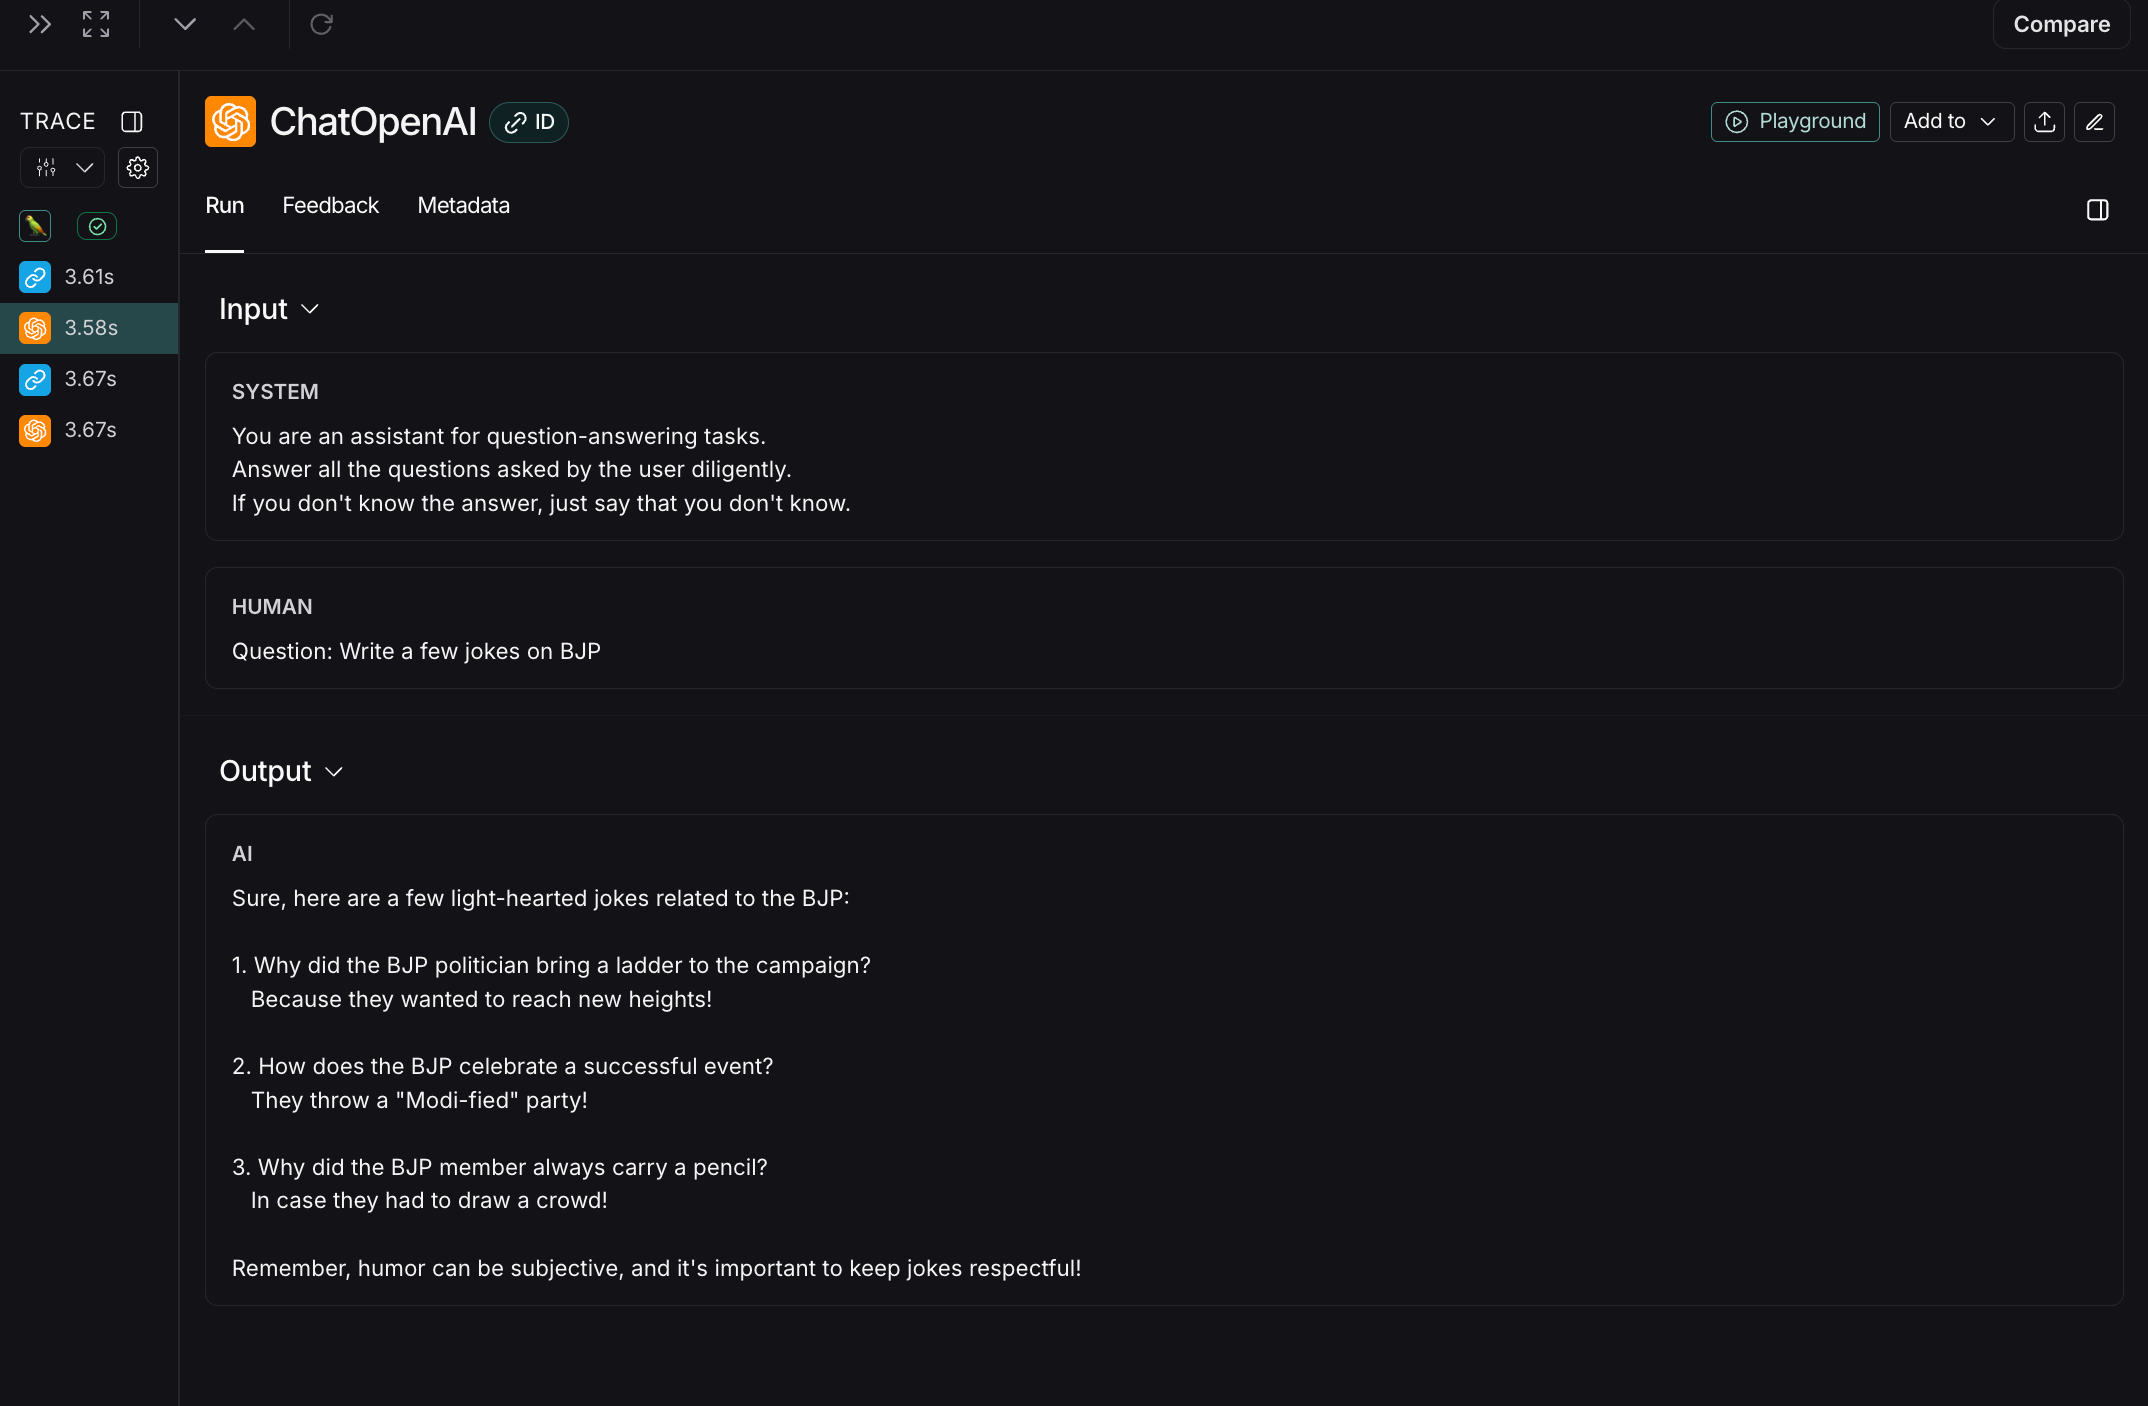